**WQD7001 Principles of Data Science Assignment**

**Project title:**
**Evolution of e-Commerce and Consumers' Behavior to Forecast Future E-Commerce Trends**

#Project Objectives

* To Investigate and analyze the customers’ behaviors on the e-commerce platform. This includes understanding purchasing patterns, identifying top contributor elements for sales and predicting customer preferences.

* To evaluate the most suitable analysis methodology that best suited the target business and further aid the decision making. This will help the businesses to understand the consumer practicality and produce business strategy.

* To develop predictive models to forecast product demand based on historical data that will aid in optimizing inventory management for future sales.


Dataset:

https://github.com/Aditya-Karanth/Machine-Learning/blob/c75ec04c3e2d755cb79dd27b908bf51fa0660eac/Sample%20Projects/Ecommerce%20Customers%20(Multiple_Linear_Regression)/Ecommerce%20Customers

#Extracting and Importing Data

In [ ]:
import pandas as pd     #read from text file with comma as separator
# Data
import numpy as np
# Visualization
import matplotlib  #data visualization library
import matplotlib.pyplot as plt  #'pyplot' module to customize plots
import seaborn as sns  #library of data visualization on top of Matplotlib for statistical graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
matplotlib.rcParams['figure.figsize'] = (10,6)  #To set the default figure size of Matplolib
df = pd.read_csv('/content/Ecommerce Customers.csv', sep=",")
#To configure to display all columns in just one line.
#By default is true, it will display the dataset based on your screen size, if have many columns and it cannot fit into the screen, the columns will be display at the bottom.
pd.set_option('expand_frame_repr', False)
#To configure to display all the rows. By default, says if have 500 rows of data, it will show only the head & tail of the data
pd.set_option('display.max_rows', None)
#print only the top 5 rows
print(df.head(5))
#print the whole dataset
#print(df)
#Display only row 1 data
#print(df.loc[0])
#Display row 1 and 2
#print(df.loc[[0, 1]])

#Check if there's any duplicate values in Avatar column
boolean = df['Avatar'].duplicated().any()
print(boolean)

                           Email                                            Address            Avatar  Avg. Session Length  Time on App  Time on Website  Length of Membership  Yearly Amount Spent
0      mstephenson@fernandez.com       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet            34.497268    12.655651        39.577668              4.082621           587.951054
1              hduke@hotmail.com     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen            31.926272    11.109461        37.268959              2.664034           392.204933
2               pallen@yahoo.com  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque            33.000915    11.330278        37.110597              4.104543           487.547505
3        riverarebecca@gmail.com   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown            34.305557    13.717514        36.721283              3.120179           581.852344
4  mstephens@davidso

In [ ]:
df.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [ ]:
df.shape

(500, 8)

#Data Pre-Processing

In [ ]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
df['Time Spent'] = df['Time on App'] + df['Time on Website']

df.drop('Avg. Session Length', axis=1, inplace=True)
df.drop('Email', axis=1, inplace=True)
df.drop('Address', axis=1, inplace=True)
df.drop('Avatar', axis=1, inplace=True)
#By default is true, it will display the dataset based on your screen size, if have many columns and it cannot fit into the screen, the columns will be display at the bottom.
pd.set_option('expand_frame_repr', False)
#To configure to display all the rows. By default, says if have 500 rows of data, it will show only the head & tail of the data
pd.set_option('display.max_rows', None)
#print only the top 5 rows
print(df.head(5))

   Time on App  Time on Website  Length of Membership  Yearly Amount Spent  Time Spent
0    12.655651        39.577668              4.082621           587.951054   52.233319
1    11.109461        37.268959              2.664034           392.204933   48.378420
2    11.330278        37.110597              4.104543           487.547505   48.440875
3    13.717514        36.721283              3.120179           581.852344   50.438796
4    12.795189        37.536653              4.446308           599.406092   50.331842


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time on App           500 non-null    float64
 1   Time on Website       500 non-null    float64
 2   Length of Membership  500 non-null    float64
 3   Yearly Amount Spent   500 non-null    float64
 4   Time Spent            500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


Ther are 9 columns in total.

#Exploratory Data Analysis

In [ ]:
df.describe()  #To get count/mean/std/min/max

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Time Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12.052488,37.060445,3.533462,499.314038,49.112933
std,0.994216,1.010489,0.999278,79.314782,1.474820
min,8.508152,33.913847,0.269901,256.670582,43.970552
25%,11.388153,36.349257,2.930450,445.038277,48.192759
50%,11.983231,37.069367,3.533975,498.887875,49.056487
75%,12.753850,37.716432,4.126502,549.313828,50.098144
max,15.126994,40.005182,6.922689,765.518462,53.112026


In this project, categorical and continuous variable are used to perform EDA to get overall pictures of data set for the project.

**Type of Variables**

**a. Categorical Variable:**
*   nominal or discrete variable that represents integer data that can take on distinct categories or labels.
*   Do not have natural order or numerical value.
*   Suitable tools: frequency table, bar charts, and statistics graph
>Example: Gender, Colour, City




1. Multivariate Analysis

*   Involve two or more variables.
*   Use to explore the relationships between the variables.

In [ ]:
#Preprocess the data: Calculate total sum for Time on App and Website
Totaltime_app = df["Time on App"].sum()
Totaltime_website = df["Time on Website"].sum()
print(Totaltime_app)
print(Totaltime_website)

6026.243968580483
18530.22271049034


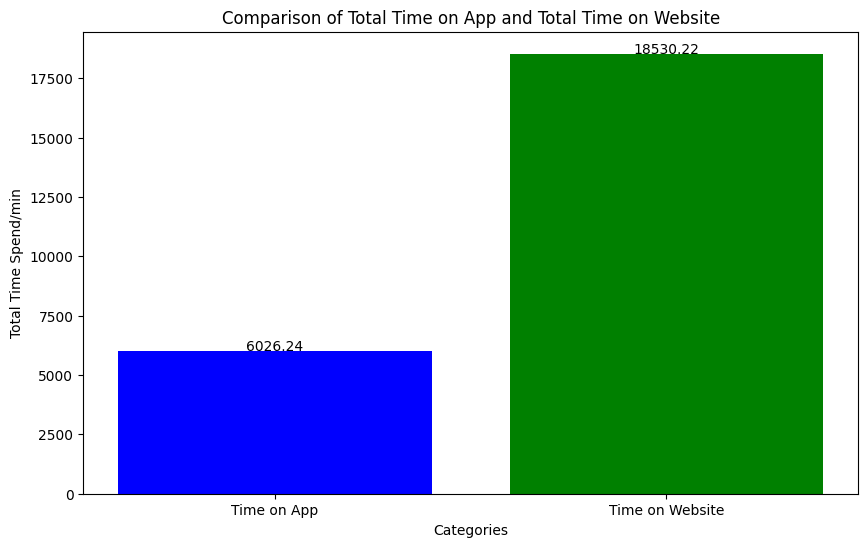

In [ ]:
#Categories & values for the bars
values = [Totaltime_app,Totaltime_website]
categories = ["Time on App","Time on Website"]

#set up barplot environment
bar = plt.bar(categories, values, color=['blue','green'])
for bar, value in zip(bar, values):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{value:.2f}', ha='center')

#create bar plot
plt.xlabel("Categories")
plt.ylabel("Total Time Spend/min")
plt.title("Comparison of Total Time on App and Total Time on Website")
plt.show()

**b.Continuous Variable:**
*   numerical variable that represents infinite number of values within a specified range.
*   With precision data which may vary continuously.
*   Suitable tools: Histogram, Box plots, central tendency
>Example: Age, Height, Income

1. Univariate Analysis

*   Focus on single variable at one time.
*   Use to check the central tendency and spread of variable.
*   Useful to detect any outliers or abnormality in single variable.



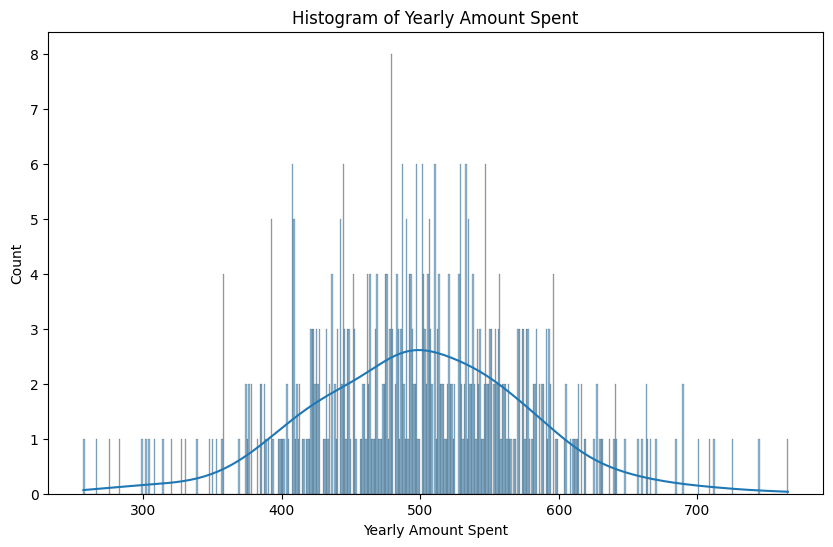

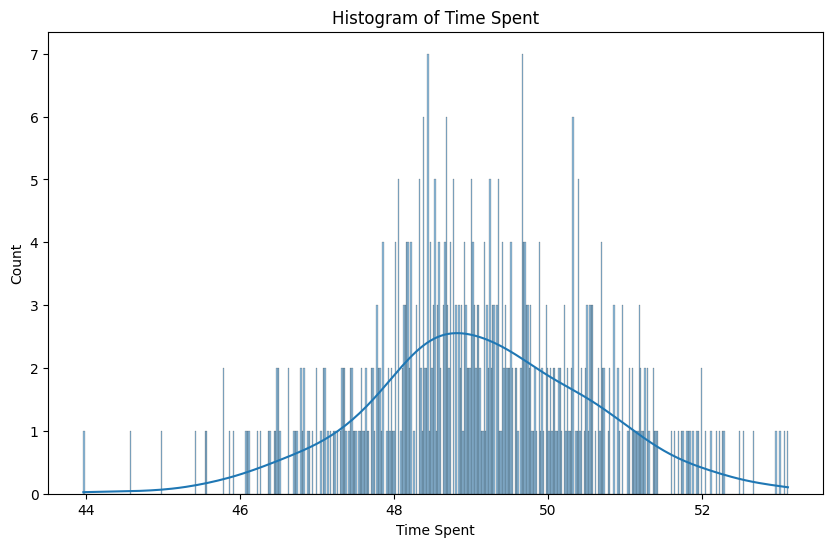

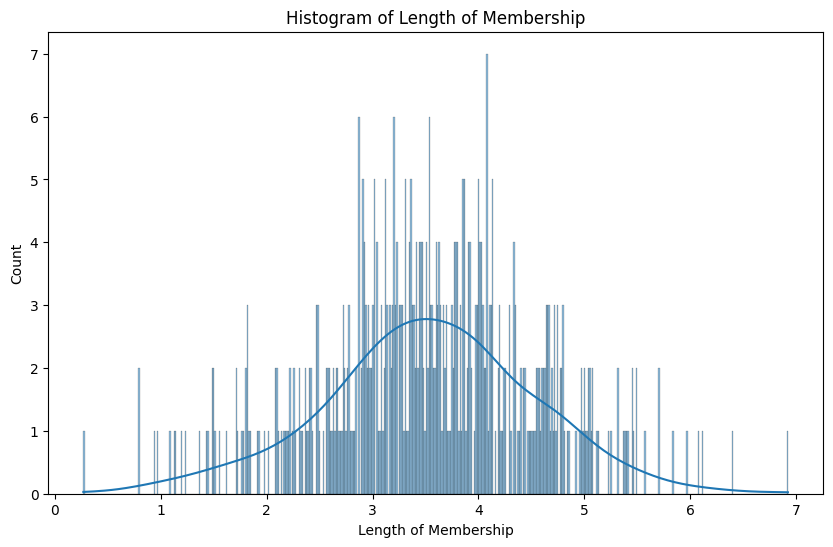

In [ ]:
#Histogram is used to shows frequency of values.

#Yearly amount spent
sns.histplot(data=df, x='Yearly Amount Spent', bins=500, kde=True)
plt.title("Histogram of Yearly Amount Spent")
plt.show()

#Time Spent
sns.histplot(data=df, x='Time Spent', bins=500, kde=True)
plt.title("Histogram of Time Spent")
plt.show()

#Length of membership
sns.histplot(data=df, x='Length of Membership', bins=500, kde=True)
plt.title("Histogram of Length of Membership")
plt.show()

From the histogram above, the yearly amount spent are mostly contributed at 500USD/year which fall at the median of the data with normal distribution.

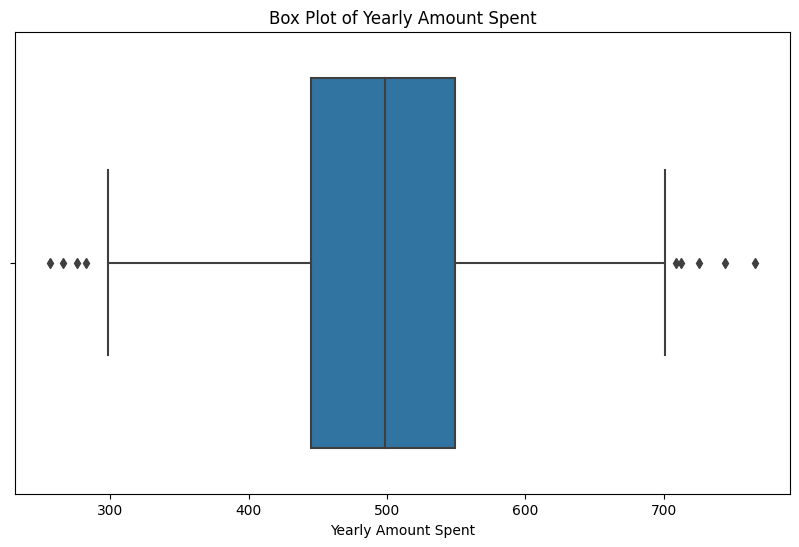

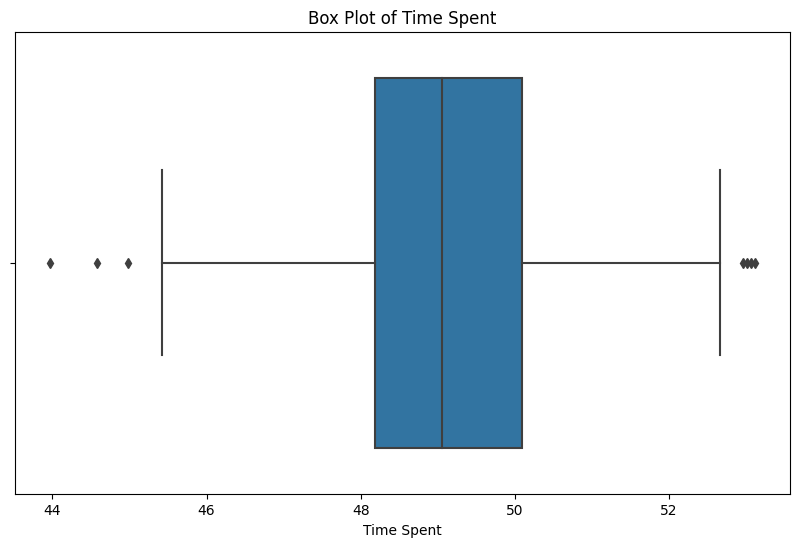

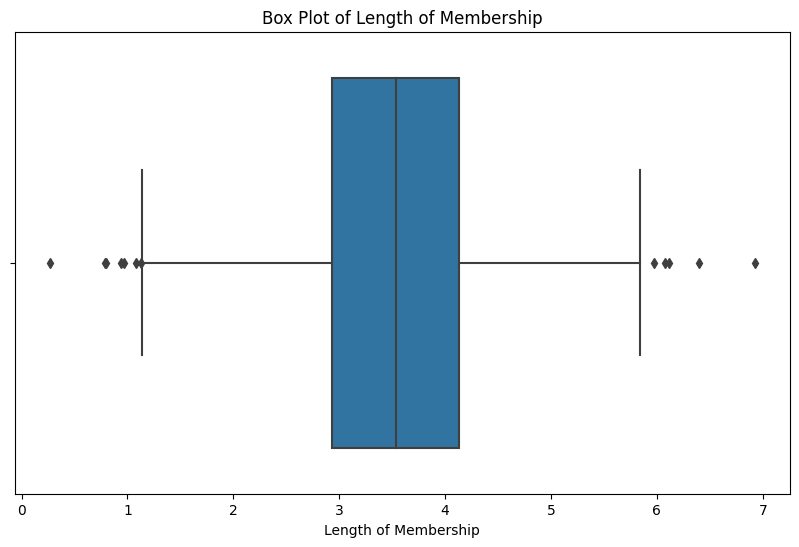

In [ ]:
#Box-and-whisker plot is used to provides information about median, quartiles, and potential outliers in the data distribution.

#Yearly Amount Spent
sns.boxplot(data=df, x='Yearly Amount Spent')
plt.title("Box Plot of Yearly Amount Spent")
plt.show()

#Time Spent
sns.boxplot(data=df, x='Time Spent')
plt.title("Box Plot of Time Spent")
plt.show()

#Length of Membership
sns.boxplot(data=df, x='Length of Membership')
plt.title("Box Plot of Length of Membership")
plt.show()

By Box plots above, there are 9 potential outliers in dataset which fall outside the whiskers, represented the values that are abnormally higher or lower as compared to average of the data.

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [ ]:
lower_range, upper_range = remove_outlier(df["Yearly Amount Spent"])
df["Yearly Amount Spent"] = np.where(df["Yearly Amount Spent"] > upper_range, upper_range, df["Yearly Amount Spent"])
df["Yearly Amount Spent"] = np.where(df["Yearly Amount Spent"] < lower_range, lower_range, df["Yearly Amount Spent"])

In [ ]:
lower_range, upper_range = remove_outlier(df["Time Spent"])
df["Time Spent"] = np.where(df["Time Spent"] > upper_range, upper_range, df["Time Spent"])
df["Time Spent"] = np.where(df["Time Spent"] < lower_range, lower_range, df["Time Spent"])

In [ ]:
lower_range, upper_range = remove_outlier(df["Length of Membership"])
df["Length of Membership"] = np.where(df["Length of Membership"] > upper_range, upper_range, df["Length of Membership"])
df["Length of Membership"] = np.where(df["Length of Membership"] < lower_range, lower_range, df["Length of Membership"])

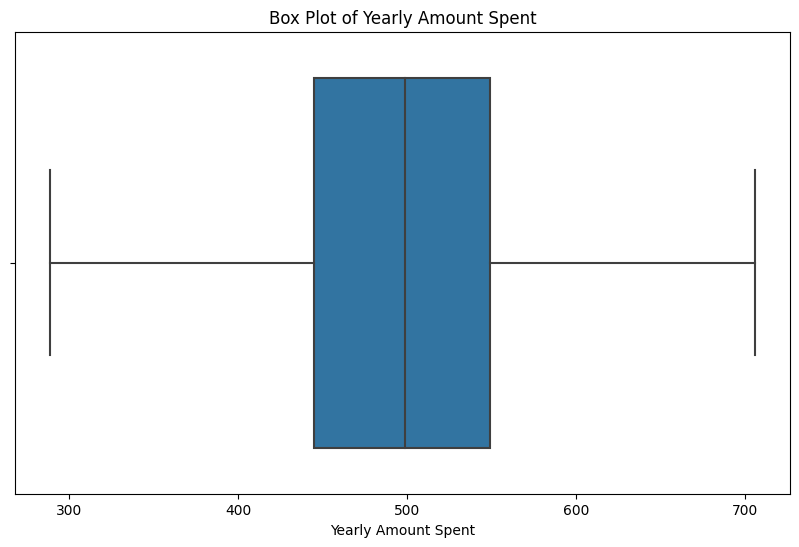

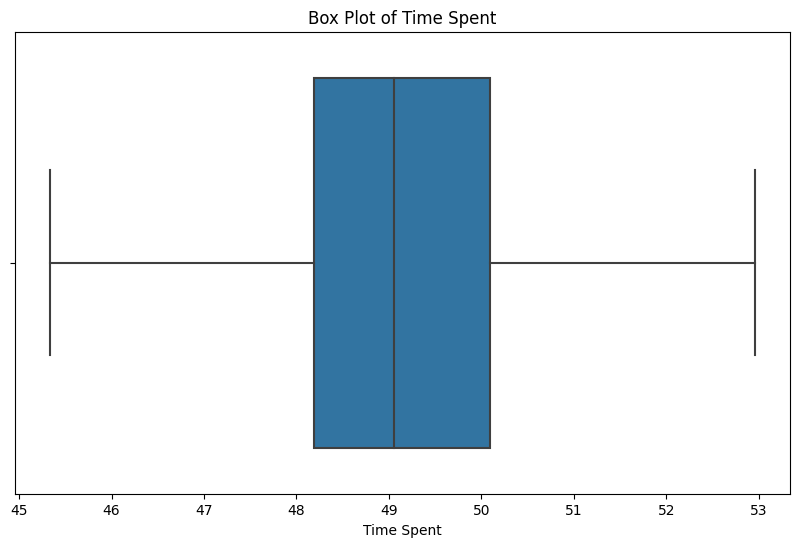

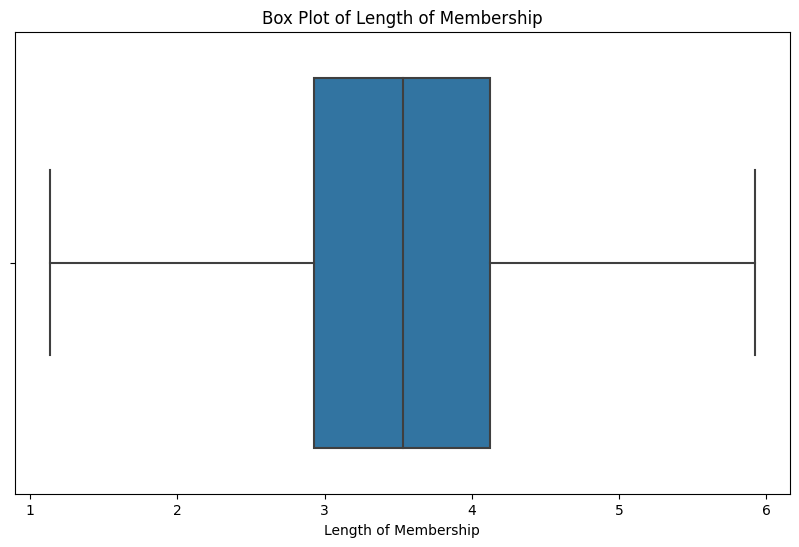

In [ ]:
#Box-and-whisker plot is used to provides information about median, quartiles, and potential outliers in the data distribution.

#Yearly Amount Spent
sns.boxplot(data=df, x='Yearly Amount Spent')
plt.title("Box Plot of Yearly Amount Spent")
plt.show()

#Time Spent
sns.boxplot(data=df, x='Time Spent')
plt.title("Box Plot of Time Spent")
plt.show()

#Length of Membership
sns.boxplot(data=df, x='Length of Membership')
plt.title("Box Plot of Length of Membership")
plt.show()

2. Multivariate Analysis

*   Involve two or more variables.
*   Use to explore the relationships between the variables.

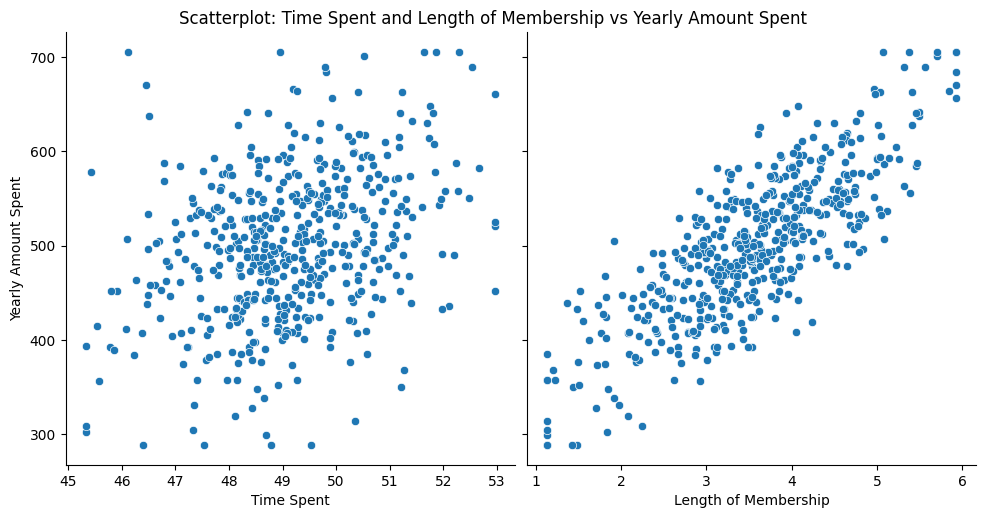

In [ ]:
sns.pairplot(df, x_vars=['Time Spent', 'Length of Membership'], y_vars='Yearly Amount Spent', kind='scatter', height=5, aspect=1, diag_kind='hist')
plt.suptitle('Scatterplot: Time Spent and Length of Membership vs Yearly Amount Spent', y=1.02)
plt.show()

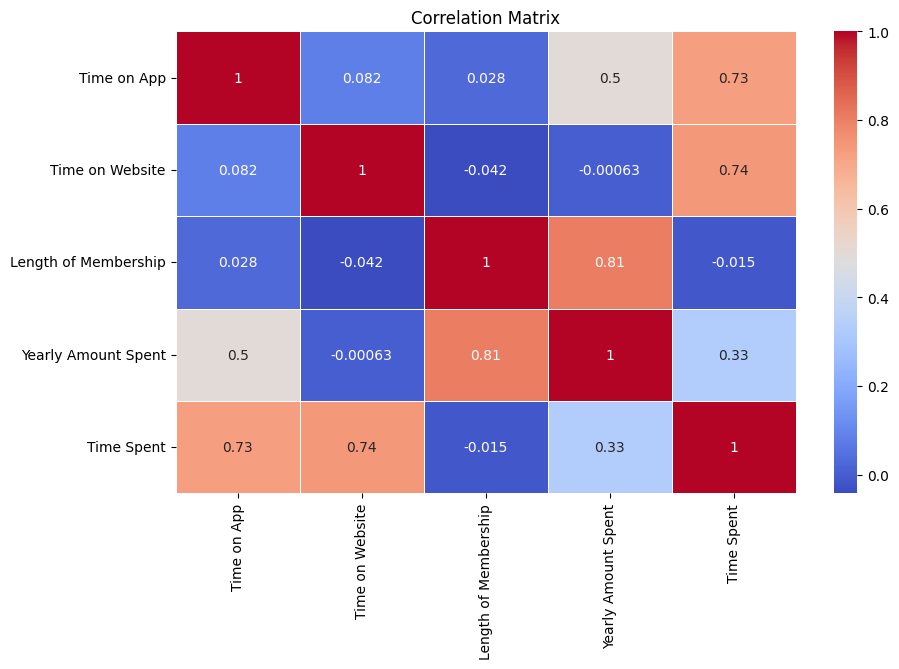

In [ ]:
#Heatmap with correlation matrix is use to show the relationship between each variables.
correlation_matrix = df.corr()   #to calculate correlation matrix

#Input Heatmap of correlation matrix with annotations, result will shows in correlation coefficients.
#0 = no linear correlation, 1 = perfect positive correlation, -1 = perfect negative correlation.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)   #annot=true means value will be display on heatmap. 'cmap' means colour pallete
plt.title('Correlation Matrix')
plt.show()

By referring to heatmap, the yearly ammount spent have significant correlation with (from highest to lowest):
1. Length of membership with correlation coefficients of 0.81.
2. Time on App with correlation coefficients of 0.5.
3. Average Session Length with correlation coefficients of 0.36.
4. Time on website with correlation coefficients of -0.0026.



Since the length of membership no correlation with time spent improve web/app won't help on retain them.

Also, most of the current customer are now with 3-4 year membership, it is important also to consider improve in Time Spend beside retain customer's loyalty.



#Data Modelling

**Proposal to increase yearly sales:**
1. Clustering: To divide the yearly amount spend into few categories
to check most of the customers prefer website or app.
Since heatmap unable to see the correlation. -behaviour(human)

2. regression:
Use to predict if we improve in time spend & length of membership
How much will the impact towards sales in %  -impact -> predit

G3: length of membership - 7yrs member may spent highest amount Y.A.S
total spend of 5-7yrs member = 10,000 USD
time spend on app/website= ?


G2: 7yrs members may not be the biggest group in overall member.
most of the member having 3-4year membership.
assumption: since spend 500USD/year
total spend of 3-4yrs member = >10,000USD
time spend on app/website=?

G1: less than 3yrs membership
?




## Get Categorical Columns

In [ ]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.values
print('Categorical cols :',cat_cols)
df.drop(cat_cols,axis=1,inplace=True)
print(df.head(5))

Categorical cols : []
   Time on App  Time on Website  Length of Membership  Yearly Amount Spent  Time Spent
0    12.655651        39.577668              4.082621           587.951054   52.233319
1    11.109461        37.268959              2.664034           392.204933   48.378420
2    11.330278        37.110597              4.104543           487.547505   48.440875
3    13.717514        36.721283              3.120179           581.852344   50.438796
4    12.795189        37.536653              4.446308           599.406092   50.331842


In [ ]:
# Get numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.values
print('Numeric cols :',num_cols)

Numeric cols : ['Time on App' 'Time on Website' 'Length of Membership'
 'Yearly Amount Spent' 'Time Spent']


In [ ]:
x = df.drop(['Time on App', 'Time on Website', 'Yearly Amount Spent'], axis=1)
y = df['Yearly Amount Spent']
print(x.head(5))

   Length of Membership  Time Spent
0              4.082621   52.233319
1              2.664034   48.378420
2              4.104543   48.440875
3              3.120179   50.438796
4              4.446308   50.331842


In [ ]:
print(y.head(5))

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64


##Fitting Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=8)

In [ ]:
model = DecisionTreeRegressor(criterion='squared_error', random_state=8)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=8)

In [ ]:
# Assuming x_test is also a NumPy array or Pandas DataFrame converted to an array
x_test = x_test.to_numpy() if isinstance(x_test, pd.DataFrame) else x_test

In [ ]:
y_pred = model.predict(x_test)
accuracy_dt = r2_score(y_test, y_pred)
print("Accuracy (R² score) of Decision Tree Regression model:", accuracy_dt)

Accuracy (R² score) of Decision Tree Regression model: 0.6283621250237703


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 48.39916727470188


In [ ]:
feature_importances = model.feature_importances_
for feature, importance in zip(x_train.columns, feature_importances):
    print(f'{feature}: {importance}')

Length of Membership: 0.7854156468048098
Time Spent: 0.21458435319519012


In [ ]:
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
print(feature_importance_df)

                Feature  Importance
0  Length of Membership    0.785416
1            Time Spent    0.214584


#Summary of features importances:

With a feature importance of 0.7854, 'length of membership' has the most significant impact on 'yearly amount spent in terms of model calculation.

'Time on app' has a relatively high impact on 'yearly amount spent' with a feature importance of 0.2145 .

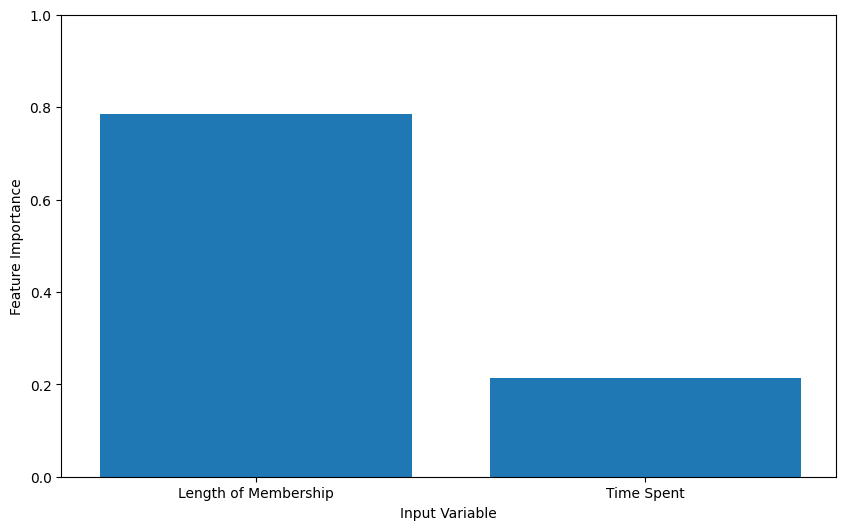

In [ ]:
input_features = x_train.columns

plt.bar(input_features, feature_importances)
plt.ylim(0.0, 1.0)
plt.xlim(-0.5)
plt.xlabel('Input Variable')
plt.ylabel('Feature Importance')
plt.xticks(rotation=0)
plt.show()

Modeling (Multiple Linear Regression)

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.values
print('Numeric column: ', num_cols)

Numeric column:  ['Time on App' 'Time on Website' 'Length of Membership'
 'Yearly Amount Spent' 'Time Spent']


In [ ]:
X = df.drop(['Time on App', 'Time on Website', 'Yearly Amount Spent'], axis=1)
Y = df['Yearly Amount Spent']
print(X.head(5))

   Length of Membership  Time Spent
0              4.082621   52.233319
1              2.664034   48.378420
2              4.104543   48.440875
3              3.120179   50.438796
4              4.446308   50.331842


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)
accuracy = r2_score(Y_test, Y_pred)
print(f"Accuracy (R² score) of the model: {accuracy}")

Accuracy (R² score) of the model: 0.7288189214032095


Text(0, 0.5, 'predicted')

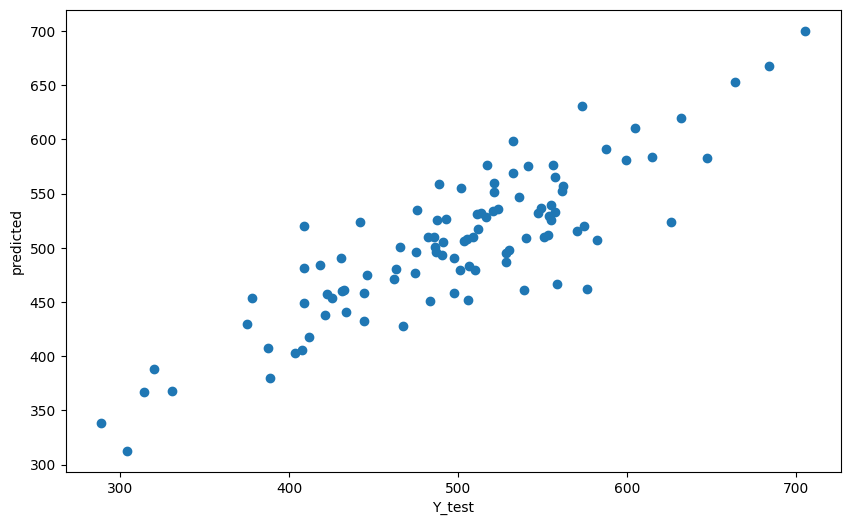

In [ ]:
predicted = model.predict(X_test)
plt.scatter(Y_test, predicted)
plt.xlabel('Y_test')
plt.ylabel('predicted')

In [ ]:
# Evaluation of Regression model
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicted)))

RMSE: 41.343534042210045


In [ ]:
# The coefficients of the model
print('Coefficients: ', model.coef_)

Coefficients:  [64.9772324  17.82634125]


<ipython-input-40-1647676772b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predicted),bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

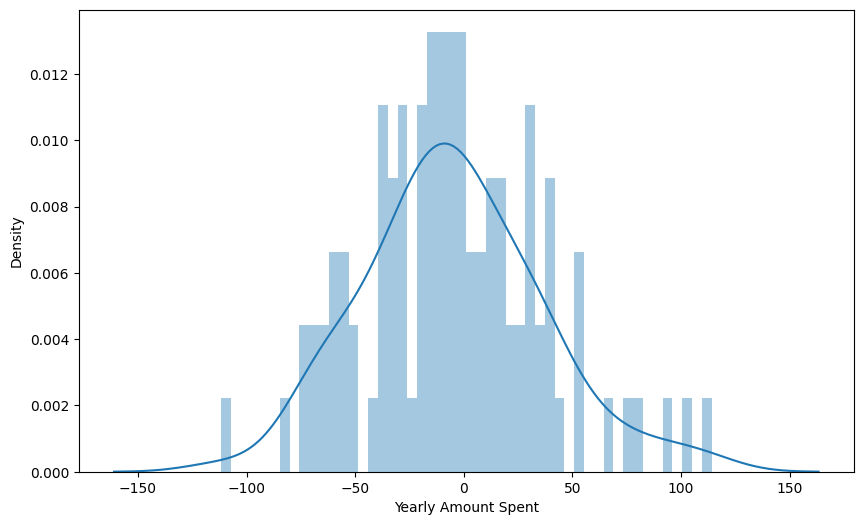

In [ ]:
# Residuals
# Plotting a histogram of the residuals and it looks normally distributed
sns.distplot((Y_test-predicted),bins=50)

Conclusion

In [ ]:
coefficients = pd.DataFrame(model.coef_,X.columns)
coefficients.columns = ['Coeffecient']
print(coefficients)

                      Coeffecient
Length of Membership    64.977232
Time Spent              17.826341


Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 64.98 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time Spent is associated with an increase of 17.83 total dollars spent.